In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [7]:
df = pd.read_csv("data\cleaned_bouts_new.csv")
df.head()

,winner,pass_stat_f1,pass_stat_f2,str_stat_f1,str_stat_f2,sub_stat_f1,sub_stat_f2,td_stat_f1,td_stat_f2
0,TJ Dillashaw,0,0,45,17,0,0,0,0
1,Henry Cejudo,2,0,51,81,0,0,3,1
2,Renato Moicano,4,0,17,20,1,0,1,0
3,JJ Aldrich,1,1,40,46,0,0,0,1
4,Thiago Santos,8,2,69,31,1,1,3,0


In [5]:
df_num = df.select_dtypes(include=[np.float, np.int])

In [10]:
df.describe(include=['O'])

,winner
count,5246
unique,1328
top,Donald Cerrone
freq,23


In [11]:
objecttypes = list(df.select_dtypes(include=['O']).columns)
for col in objecttypes:
    df[col] = df[col].astype('category')

In [12]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5246 entries, 0 to 5245
Data columns (total 9 columns):
winner          5246 non-null int16
pass_stat_f1    5246 non-null int64
pass_stat_f2    5246 non-null int64
str_stat_f1     5246 non-null int64
str_stat_f2     5246 non-null int64
sub_stat_f1     5246 non-null int64
sub_stat_f2     5246 non-null int64
td_stat_f1      5246 non-null int64
td_stat_f2      5246 non-null int64
dtypes: int16(1), int64(8)
memory usage: 338.2 KB


,winner,pass_stat_f1,pass_stat_f2,str_stat_f1,str_stat_f2,sub_stat_f1,sub_stat_f2,td_stat_f1,td_stat_f2
5241,299,0,0,24,38,0,0,0,0
5242,338,5,0,46,18,0,1,3,0
5243,581,2,0,15,5,1,0,1,0
5244,500,0,0,119,105,0,0,0,0
5245,542,1,0,24,16,1,0,2,1


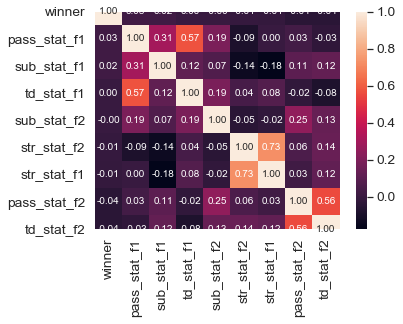

In [14]:
import seaborn as sns

k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
# We Store prediction of each model in our dict
# Helper Functions for our models. 

from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

def percep(X_train,Y_train,X_test,Y_test,Models):
    perceptron = Perceptron(max_iter = 1000, tol = 0.001)
    perceptron.fit(X_train, Y_train)
    Y_pred = perceptron.predict(X_test)
    Models['Perceptron'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def ranfor(X_train,Y_train,X_test,Y_test,Models):
    randomfor = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1
                                      )
    randomfor.fit(X_train,Y_train)
    Y_pred = randomfor.predict(X_test)
    Models['Random Forests'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def dec_tree(X_train,Y_train,X_test,Y_test,Models):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    Models['Decision Tree'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def run_all_and_Plot(df):
    Models = dict()
    from sklearn.model_selection import train_test_split
    X_all = df.drop(['winner'], axis=1)
    y_all = df['winner']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    percep(X_train,Y_train,X_test,Y_test,Models)
    ranfor(X_train,Y_train,X_test,Y_test,Models)
    dec_tree(X_train,Y_train,X_test,Y_test,Models)
    

def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of different models')
    plt.show()


# def plot_cm(dict):
#     count = 1
#     fig = plt.figure(figsize=(10,10))
#     for model in dict:
#         cm = dict[model][1]
#         labels = ['W','L','N','D']
#         ax = fig.add_subplot(4,4,count)
#         cax = ax.matshow(cm)
#         plt.title(model,y=-0.8)
#         fig.colorbar(cax)
#         ax.set_xticklabels([''] + labels)
#         ax.set_yticklabels([''] + labels)
#         plt.xlabel('Predicted')
#         plt.ylabel('True')
#         # plt.subplot(2,2,count)
#         count+=1
#     plt.tight_layout()
#     plt.show()

In [19]:
accuracies = run_all_and_Plot(df)
CompareAll = dict()
CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
# plot_cm(accuracies)

MemoryError: could not allocate 80871424 bytes